In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#from sklearn import datasets
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix
#%reload_ext memory_profiler

# Data Loading and Exploration

In [2]:
df =  pd.read_csv(r'C:\Users\hp\Desktop\fraudTest.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
df.shape

(555719, 23)

In [5]:
df = df.drop_duplicates()
df = df.dropna()

In [6]:
df.shape

(555719, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Data Visualization

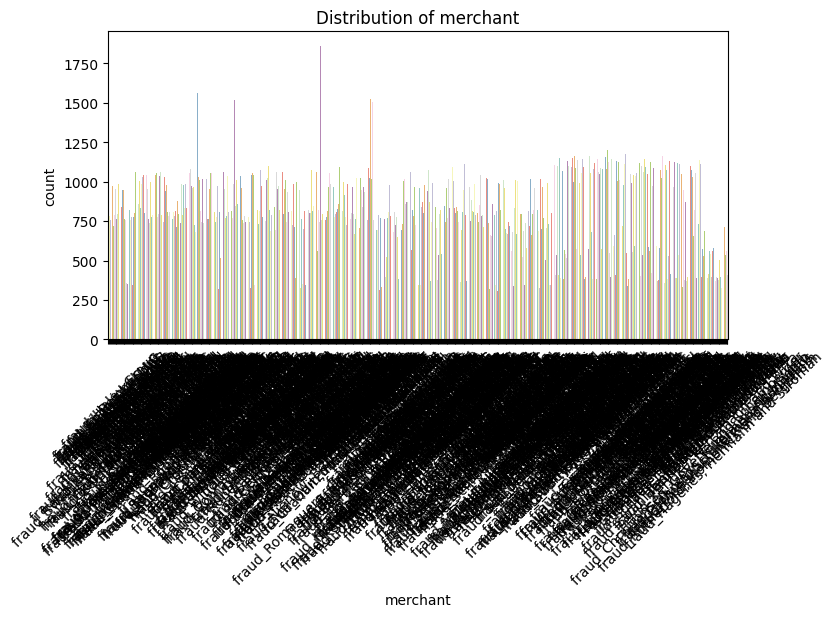

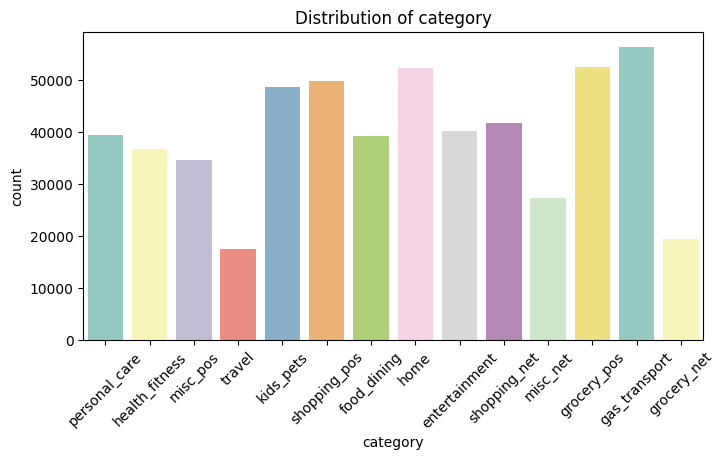

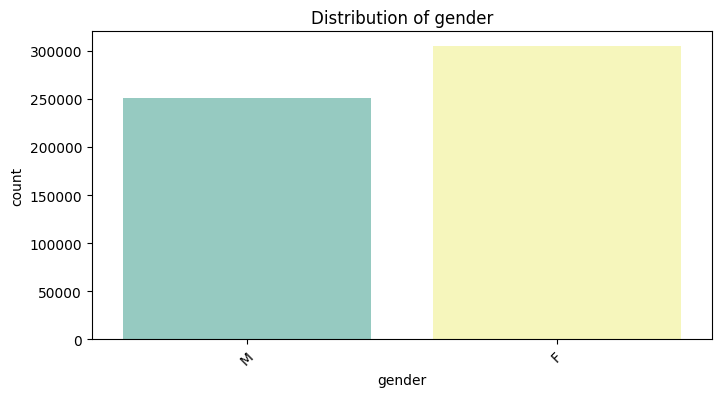

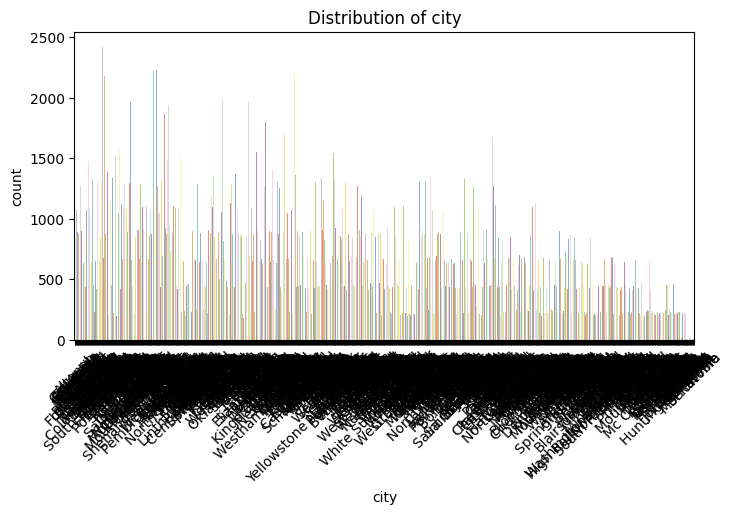

In [8]:
categorical_columns = ['merchant', 'category', 'gender','city']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, palette='Set3')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

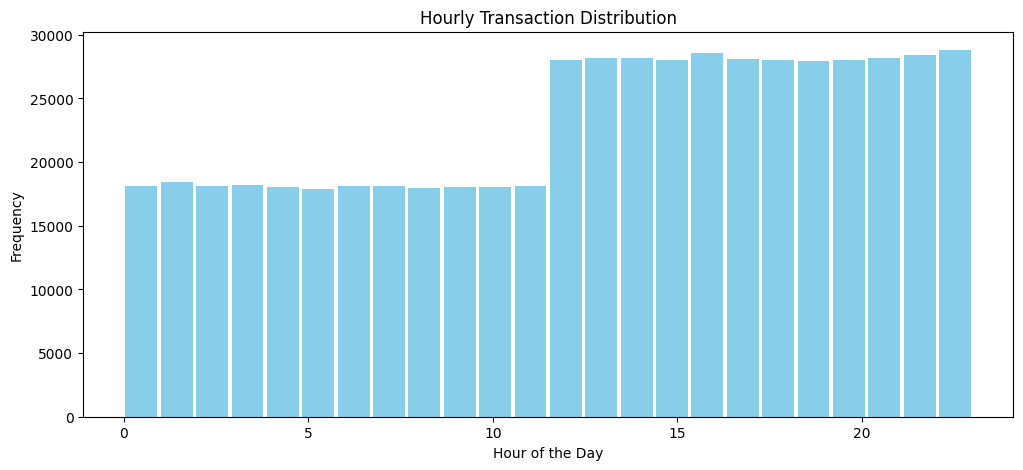

In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Time-based analysis
plt.figure(figsize=(12, 5))
df['trans_date_trans_time'].dt.hour.plot(kind='hist', bins=24, rwidth=0.9, color='skyblue')
plt.title('Hourly Transaction Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

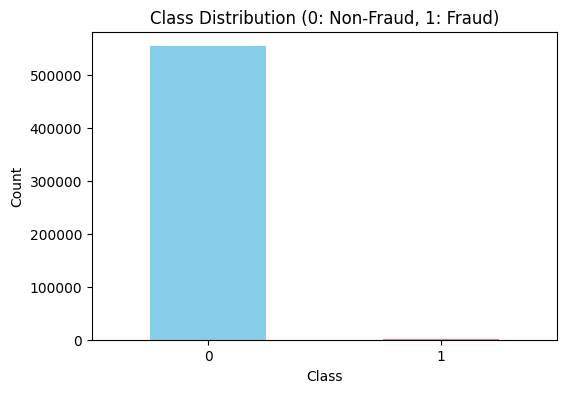

In [9]:
# Visualize the class distribution
plt.figure(figsize=(6, 4))
df['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

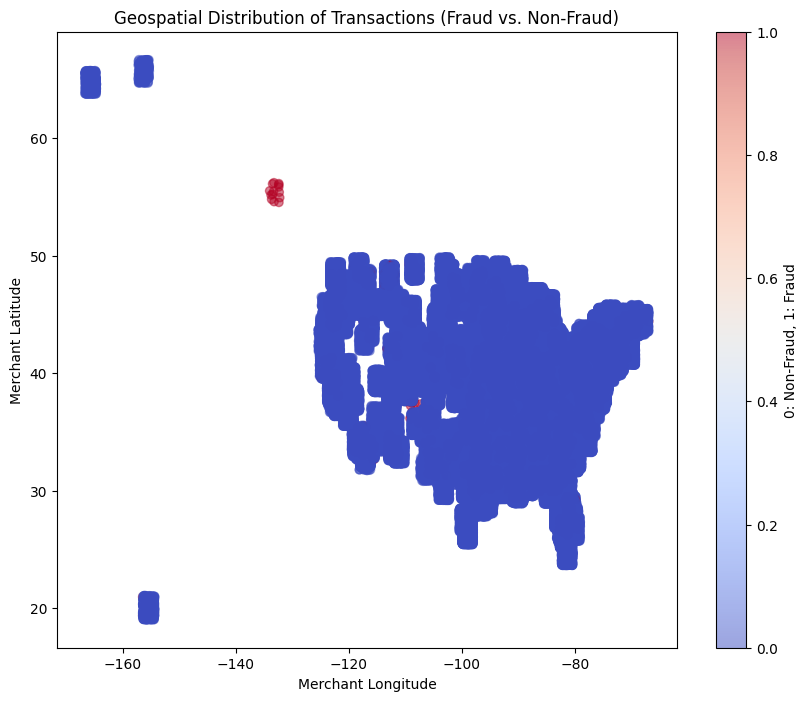

In [10]:
# Geospatial data - Scatter plot of transactions
plt.figure(figsize=(10, 8))
plt.scatter(df['merch_long'], df['merch_lat'], c=df['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geospatial Distribution of Transactions (Fraud vs. Non-Fraud)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.colorbar(label='0: Non-Fraud, 1: Fraud')
plt.show()

# Data Featuring and Transformation

In [11]:
# Feature 1: Transaction Amount Decimal Part
df['amt_decimal'] = df['amt'] % 1

# Ensure 'trans_date_trans_time' is treated as a string
df['trans_date_trans_time'] = df['trans_date_trans_time'].astype(str)

# Feature 2: Age of Cardholder at the Time of Transaction
df['transaction_date'] = pd.to_datetime(df['trans_date_trans_time'].str.split(' ').str[0])
df['cardholder_age'] = (df['transaction_date'] - pd.to_datetime(df['dob'])).dt.days // 365

# Feature 3: Transaction Amount to City Population Ratio
df['amt_to_city_pop_ratio'] = df['amt'] / df['city_pop']

# Display the updated dataset with new features
print(df[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


In [12]:
columns_to_drop = [
    'Unnamed: 0',        # An index or identifier
    'cc_num',            # Masked credit card numbers
    'trans_date_trans_time',  #We have unix_time
    'transaction_date',  # Same as unix_time
    'first',             # First name
    'last',              # Last name
    'street',            # Street address
    'city',              # City (state information is more relevant)
    'state',             # State (zip code and lat/long provide location info)
    'zip',               # Zip code (redundant with lat/long)
    'dob',               # Date of birth (we've calculated cardholder_age)
    'trans_num',         # Transaction number or identifier
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated dataset
print(df.head())

                               merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

       lat      long  city_pop                     job   unix_time  merch_lat  \
0  33.9659  -80.9355    333497     Mechanical engineer  1371816865  33.986391   
1  40.3207 -110.4360       302  Sales professional, IT  1371816873  39.450498   
2  40.6729  -73.5365     34496       Librarian, public  1371816893  40.495810   
3  28.5697  -80.8191     54767            Set designer  1371816915  28.812398   
4  44.2529  -85.0170      1126      Furniture designer  1371816917  44.959148   

   merch_long  is_fraud  amt_decimal  cardholder_age  amt_to_city_pop_rati

In [13]:
testing_data=pd.read_csv (r'C:\Users\hp\Desktop\fraudTest.csv')

# Handle missing values (if any)
testing_data = testing_data.dropna()

In [14]:
# Feature 1: Transaction Amount Decimal Part
testing_data['amt_decimal'] = testing_data['amt'] % 1

# Ensure 'trans_date_trans_time' is treated as a string
testing_data['trans_date_trans_time'] = testing_data['trans_date_trans_time'].astype(str)

# Feature 2: Age of Cardholder at the Time of Transaction
testing_data['transaction_date'] = pd.to_datetime(testing_data['trans_date_trans_time'].str.split(' ').str[0])
testing_data['cardholder_age'] = (testing_data['transaction_date'] - pd.to_datetime(testing_data['dob'])).dt.days // 365

# Feature 3: Transaction Amount to City Population Ratio
testing_data['amt_to_city_pop_ratio'] = testing_data['amt'] / testing_data['city_pop']

# Display the updated dataset with new features
print(testing_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


In [15]:
testing_data = testing_data.drop(columns=columns_to_drop)

In [16]:
# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    testing_data[col] = label_encoder.fit_transform(testing_data[col])

# Data Spliting

In [17]:
# Split the data into features (X) and the target variable (y)
X_train = df.drop(columns=['is_fraud'])
y_train = df['is_fraud']

In [18]:
X_val = testing_data.drop(columns=['is_fraud'])
y_val = testing_data['is_fraud']

In [19]:
independent_variables = df[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']]
dependent_variable = df['is_fraud']

In [20]:
independent_variables

,amt_decimal,cardholder_age,amt_to_city_pop_ratio
0,0.86,52,0.000009
1,0.84,30,0.098808
2,0.28,49,0.001197
3,0.05,32,0.001096
4,0.19,65,0.002833
...,...,...,...
555714,0.77,54,0.084335
555715,0.84,21,0.003892
555716,0.88,39,0.023583
555717,0.99,55,0.061938


In [21]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [22]:
print('is_fraud shape is: ', df.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

is_fraud shape is:  (555719, 15)
x_train shape is:  (444575, 3)
x_test shape is:  (111144, 3)
y_train shape is:  (444575,)
y_test shape is:  (111144,)


## K-Folds

In [23]:
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(independent_variables, dependent_variable):
    x_train, x_test, y_train, y_test = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444576, 3) (111143, 3) (444576,) (111143,)


In [24]:
from sklearn.model_selection import StratifiedKFold
stratified_folds = StratifiedKFold(n_splits = 5, shuffle=True)

for train_index, test_index in stratified_folds.split(independent_variables, dependent_variable):
    x_train, X_val, y_train, y_val = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
    print(x_train.shape, X_val.shape, y_train.shape, y_val.shape)

(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444575, 3) (111144, 3) (444575,) (111144,)
(444576, 3) (111143, 3) (444576,) (111143,)


In [29]:
accuracy_score_list = []

def classfication_evaluation(prediction, y_test):
    #%memit
    
    actual_predicted = pd.DataFrame(data= [prediction, y_test], index = ['predicted_value', 'actual_value']).transpose()
    cm = metrics.confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value)
    accuracy_score = metrics.accuracy_score(actual_predicted.actual_value, actual_predicted.predicted_value)
    print('\n accuracy score \t\t', accuracy_score)
    accuracy_score_list.append(accuracy_score)
    print('\n confusion matrix', cm, sep = '\n\n')
    print('\n\n', metrics.classification_report(actual_predicted.actual_value, actual_predicted.predicted_value))
    
    tp, fn, fp, tn = confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value).ravel()
    print('Number of true positives are :',tp)
    print('Number of false negatives are :',fn)
    print('Number of false positives are :',fp)
    print('Number of true negatives are :',tn)
    
    
    # draw heatmap of confusion matrix
    sns.heatmap(cm, annot=True, square=True, annot_kws = {'wrap': False ,'size': 15, 'rotation': 45},
            fmt='g',
            xticklabels=['Is Fraud', 'no fraud'],
            yticklabels=['Is Fraud', 'no fraud'],
            robust = True,
            cmap="YlGnBu",
            linewidths=5, linecolor='grey',
            cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', fontdict={'fontsize': 15}, pad = 15)
    

## Logistic Regression

In [25]:
reg = LogisticRegression()
reg = reg.fit(x_train, y_train)
prediction = reg.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
reg.predict_proba(x_test)

array([[0.99628125, 0.00371875],
       [0.99667875, 0.00332125],
       [0.99649014, 0.00350986],
       ...,
       [0.99640158, 0.00359842],
       [0.99600416, 0.00399584],
       [0.99673883, 0.00326117]])


 accuracy score 		 0.9982994880469306

 confusion matrix

[[110954      5]
 [   184      0]]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110959
           1       0.00      0.00      0.00       184

    accuracy                           1.00    111143
   macro avg       0.50      0.50      0.50    111143
weighted avg       1.00      1.00      1.00    111143

Number of true positives are : 110954
Number of false negatives are : 5
Number of false positives are : 184
Number of true negatives are : 0


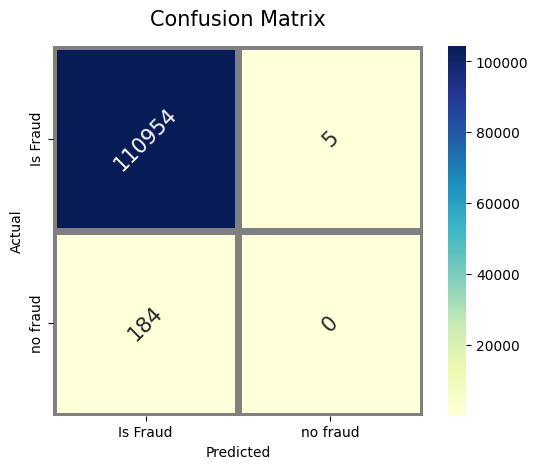

In [30]:
classfication_evaluation(prediction, y_test)

## K nearest neighbour

In [31]:
knn=neighbors.KNeighborsClassifier(n_neighbors=10, metric='minkowski')
fit=knn.fit(x_train, y_train)

In [32]:
prediction=fit.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
print('3NN accuracy:', metrics.accuracy_score(y_test, prediction))

3NN accuracy: 0.9983534725533771


In [34]:
correct = prediction == y_test
correct.sum()

110960

In [35]:
actual_predicted = pd.DataFrame(data= [prediction, y_test, correct], index = ['predicted_value', 'actual_value', 'correct']).transpose()
print(actual_predicted.correct.value_counts())
actual_predicted.head(20)

True     110960
False       183
Name: correct, dtype: int64


,predicted_value,actual_value,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True
